# Part    1    ‑    Exploratory    data    analysis  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer, log_loss
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [152]:
from sklearn.metrics import balanced_accuracy_score

In [3]:
# start by reading in the data file
df = pd.read_json('./logins.json')

### Make sure the data is reasonable

In [7]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [9]:
df.isna().sum()

login_time    0
dtype: int64

In [24]:
df.head()

,logins
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


#### Potential data quality issue: login time is not sorted chronologicaly, however, resample takes care of it

In [20]:
# aggregate logins to 15 minute time intervals
df.set_index('login_time', inplace=True)
df['logins'] = 1

# index is not sorted, but resample takes care of it!
df15 = df.resample('15T').sum()
df15.head()

,logins
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
1970-01-01 20:21:41,1
1970-01-01 20:12:16,1
1970-01-01 20:35:47,1
1970-01-01 20:35:38,1


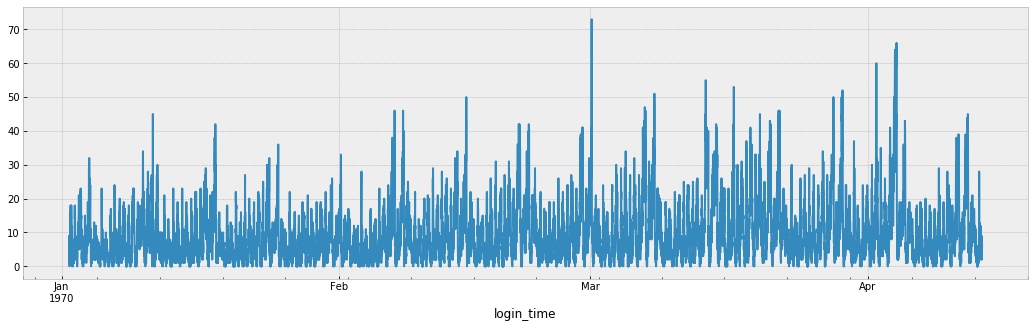

In [68]:
# plot of all logins - doesn't say much
df15.logins.plot.line(figsize=(18,5))

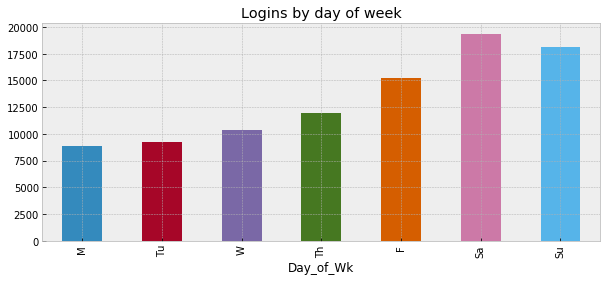

In [64]:
#logins by day
mpl.style.use('bmh')
fig = plt.figure(figsize=(10,4))
daymap = ['M','Tu','W','Th','F','Sa','Su']
df15['Day_of_Wk'] = df15.index.dayofweek
ax = df15.groupby('Day_of_Wk').logins.sum().plot(kind='bar', title='Logins by day of week')
ax.set_xticklabels(daymap)
plt.show()

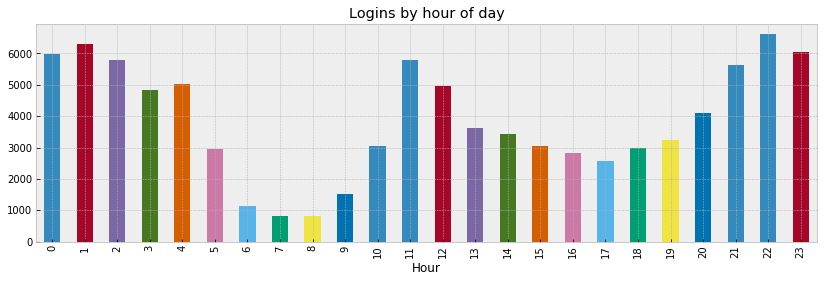

In [66]:
#logins by time of day
df15['Hour'] = df15.index.hour
df15.groupby('Hour').logins.sum().plot(kind='bar', title='Logins by hour of day', figsize=(14,4))

It looks like demand gradually increases throughout the week, and then sharply increases for the weekend, with the highest demand day on Saturday followed by Sunday. During the day, logins are the lowest in the morning, spike up at 11 and 12 probably for lunch time, and then increase from about 5pm until 10pm and staying high until about 3am, probably due to people going out and not wanting to drive

## Part 2 - Experiment and metrics design

1. While the proposed experiment encourages driver partners to serve both cities, the ultimate goal is probably to increase ridership. I'm sure Ultimate has data on driver wherabouts and could directly measure if they do indeed serve both cities when tolls are reimbursed. However, that might not be as interesting as a metric of success of ridership levels before and after implementing this experiment. This gets more to the bottom line business question.

2. An experiment would be to collect ridership data before reimbursing tolls, and do the same after to see the affect on this metric.

- 2a. I would implement this by collecting ridership data for at least one week, to cover the daily cycles, and then implement the reimbursement experiment and then collect ridership data again for an equal period of time.

- 2b. I would run a p-value significance test to make sure the data is significant. The null hypothesis is that the change in ridership is normal and the reimbursement had no affect. To test this, I would calculate the probability of the change in ridership is purely by chance, based on previous distributions. If it is lower than a p-value of say 0.05, then the observation is significant. 

- 2c. If the observation is significant based on the p-value, I would communicate that reimbursing tolls does increase ridership, and then what would be the expected increase. Of course, a caveat would be how much did it cost to reimburse tolls. The city operations team would then decide if the cost is worth the increase in ridership. It wouldn't be a straight math decision, as increasing ridership at even a negative net cost may have future business advantages. 

## Part 3 ‑ Predictive modeling

In [73]:
# userdf = pd.read_json('./ultimate_data_challenge.json') -> gives error
with open('./ultimate_data_challenge.json', 'r') as f:
    read_data = f.read()
data = json.loads(read_data)    
userdf = pd.DataFrame(data)

In [87]:
# make the date columns the right dtype
udf = userdf.astype({'last_trip_date':'datetime64', 'signup_date':'datetime64'})
udf.head()

In [89]:
# good to look at general stats of the features
udf.describe(include='all')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000,50000,49604,50000,50000.000000,50000.000000,50000,50000.000000
unique,NaN,NaN,NaN,NaN,3,182,2,31,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,Winterfell,2014-06-29 00:00:00,iPhone,2014-01-18 00:00:00,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,23336,2036,34582,2948,NaN,NaN,31146,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:00:00,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-07-01 00:00:00,NaN,2014-01-31 00:00:00,NaN,NaN,NaN,NaN
mean,5.796827,4.778158,4.601559,1.074764,NaN,NaN,NaN,NaN,8.849536,2.278200,NaN,60.926084
std,5.707357,0.446652,0.617338,0.222336,NaN,NaN,NaN,NaN,19.958811,3.792684,NaN,37.081503
min,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,2.420000,4.700000,4.300000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,33.300000


In [88]:
udf.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
dtype: object

In [97]:
# from data above, a user is retained if they took a trip after June 1. All users signed up in January.
udf['retained'] = (udf.last_trip_date > '2014-06-01')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
13,3.04,5.0,4.0,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0
16,10.86,3.0,5.0,1.00,King's Landing,2014-06-28,Android,2014-01-11,0.0,1,True,50.0
17,2.38,4.8,3.9,1.00,King's Landing,2014-07-01,iPhone,2014-01-12,0.0,0,True,95.2
18,6.83,4.8,4.6,1.21,King's Landing,2014-06-24,iPhone,2014-01-28,30.8,6,True,80.8
19,12.08,5.0,5.0,1.17,King's Landing,2014-06-03,iPhone,2014-01-02,33.3,0,False,66.7
23,7.74,5.0,5.0,1.00,King's Landing,2014-06-13,Android,2014-01-21,0.0,0,True,100.0
28,5.97,5.0,NaN,1.50,Winterfell,2014-06-08,iPhone,2014-01-19,100.0,0,False,0.0


In [105]:
# any missing data?
udf.isna().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
retained                     0
dtype: int64

In [111]:
# replace missing ratings with the mean ratings
# replacing missing phone with 'other'
bydrivermean = udf.avg_rating_by_driver.mean()
ofdrivermean = udf.avg_rating_of_driver.mean()
udf.fillna(value={'avg_rating_by_driver': bydrivermean, 'avg_rating_of_driver': ofdrivermean\
          , 'phone':'other'}, inplace=True)

In [112]:
# no more missing data
udf.isna().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
retained                  0
dtype: int64

### Average distance removing outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB888658D0>]],
      dtype=object)

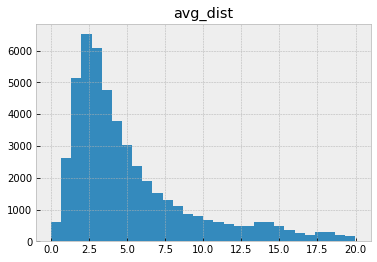

In [120]:
udf[udf.avg_dist < 20].hist(column='avg_dist', bins=30)

### Users by city

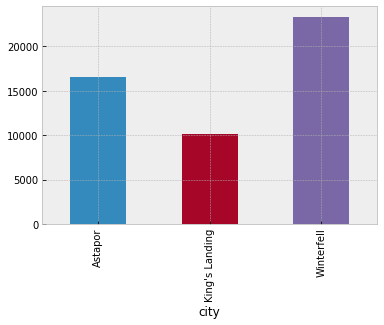

In [124]:
udf.groupby('city').count().signup_date.plot(kind='bar')

### Users by phone type

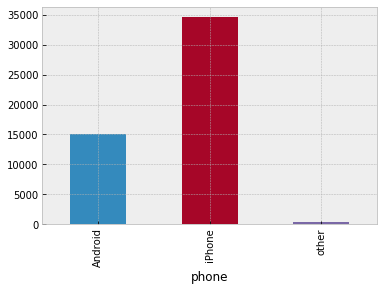

In [125]:
udf.groupby('phone').count().signup_date.plot(kind='bar')

In [131]:
udf.retained.describe()

count     50000
unique        2
top       False
freq      31690
Name: retained, dtype: object

In [133]:
retained_users = (50000 - 31690) / 50000
retained_users

0.3662

### Percent of users retained = 36.6%

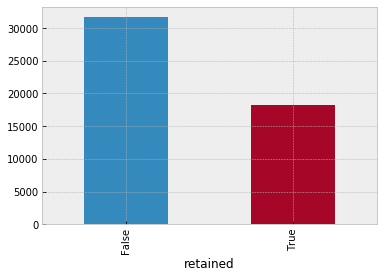

In [126]:
udf.groupby('retained').count().signup_date.plot(kind='bar')

In [139]:
# drop last_trip_date and signup_date because don't need them for predictions
# convert category data to numeric
udf2 = udf.drop(['last_trip_date', 'signup_date'], axis=1)

In [141]:
udf2['phone_code'] = udf2.phone.astype('category').cat.codes
udf2['city_code'] = udf2.city.astype('category').cat.codes
udf2 = udf2.astype({'retained':'int', 'ultimate_black_user':'int'})

### Model Selection

I'm going to use a random forests classifier as my predictive model. In my experience, random forests work well as a classifier. Also, this classifier will list the feature importance, which will be important in making any business decissions. I will do a gridsearch with 5-fold cross validation on the training set to get the best parameters. The data is split up into two thirds training and one third testing - a fairly standard split. The downside is this model takes relatively longer to train, partly because off all the parameters to tune.

In [144]:
# get feature label data, and training / testing split
X = udf2.drop(['phone', 'city', 'retained'], axis=1)
y = udf2.retained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [148]:
# parameter grid to search through
rfc = RandomForestClassifier()
p_grid = [
    {'n_estimators': [10, 100, 1000],
     'max_depth': [4, 2, None],
     'min_samples_split': [2, 4, 10],
     'criterion': ['gini', 'entropy'],
     'min_samples_leaf':[1, 2],
     'max_features':['sqrt', None],
     'class_weight':['balanced', None]
     }
]

In [149]:
# Do the grid search with cross validation
clf = GridSearchCV(estimator=rfc, cv=5, param_grid=p_grid, scoring='neg_log_loss')
clf.fit(X_train,y_train)
print(clf.best_params_)
gsrfdf = pd.DataFrame(clf.cv_results_)
gsrfdf[gsrfdf.rank_test_score <= 20]

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}


C:\Users\robin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\robin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\robin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\robin\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
83,21.413093,0.079819,1.476114,0.014978,balanced,gini,None,sqrt,2,2,...,-0.466172,0.005595,15,-0.245055,-0.243917,-0.242566,-0.243588,-0.243716,-0.243768,0.000795
86,21.388536,0.129798,1.487484,0.029334,balanced,gini,None,sqrt,2,4,...,-0.466272,0.005899,16,-0.245191,-0.244044,-0.242561,-0.243839,-0.243642,-0.243856,0.000842
89,20.086247,0.146237,1.336017,0.015728,balanced,gini,None,sqrt,2,10,...,-0.464692,0.005429,10,-0.302857,-0.300950,-0.299989,-0.300715,-0.300604,-0.301023,0.000970
191,27.977811,0.111729,1.495678,0.035144,balanced,entropy,None,sqrt,2,2,...,-0.465934,0.005889,13,-0.240046,-0.238793,-0.237588,-0.238790,-0.238521,-0.238747,0.000786
194,27.965358,0.287223,1.485368,0.012843,balanced,entropy,None,sqrt,2,4,...,-0.466064,0.005750,14,-0.240340,-0.238819,-0.237389,-0.238378,-0.238316,-0.238648,0.000965
196,2.600360,0.024004,0.140346,0.009282,balanced,entropy,None,sqrt,2,10,...,-0.466564,0.006297,18,-0.296051,-0.294431,-0.293521,-0.293322,-0.293532,-0.294172,0.001015
197,25.975095,0.027907,1.335183,0.008894,balanced,entropy,None,sqrt,2,10,...,-0.463560,0.005274,9,-0.295460,-0.293448,-0.292514,-0.293293,-0.293218,-0.293586,0.000990
296,21.345540,0.429107,1.453893,0.019345,None,gini,None,sqrt,1,10,...,-0.467106,0.007099,20,-0.264987,-0.262706,-0.263011,-0.262764,-0.262572,-0.263208,0.000901
298,2.092790,0.012328,0.148943,0.001216,None,gini,None,sqrt,2,2,...,-0.466641,0.008526,19,-0.242110,-0.239239,-0.239716,-0.239767,-0.240249,-0.240216,0.000999
299,21.453939,0.297839,1.507880,0.035181,None,gini,None,sqrt,2,2,...,-0.462631,0.006624,8,-0.241239,-0.239609,-0.238503,-0.239308,-0.239402,-0.239612,0.000896


In [150]:
# tuned on log loss
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10, random_state=42, class_weight=None,\
                               criterion='entropy', max_features='sqrt', min_samples_leaf=2)
rf_clf.fit(X_train, y_train)

# make predictions both classifically and probabilisticly
rf_pred_proba = rf_clf.predict_proba(X_test)
rf_pred = rf_clf.predict(X_test)

In [154]:
# variouse scoringn metrics
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, rf_pred))
print('Log loss               : ', log_loss(y_test, rf_pred_proba))
print('F1 score               : ', f1_score(y_test, rf_pred))
print('ROC AUC score          : ', roc_auc_score(y_test, rf_pred_proba[:,1]))

Balanced Accuracy Score:  0.7577638904732537
Log loss               :  0.4636188843212807
F1 score               :  0.6907476716859606
ROC AUC score          :  0.846203960410087


### Model scoring
From the model scores on the test data above, the balanced accuracy score of 0.758 and the ROC_AUC score of 0.846 indicates the model does decently well. I would consider this model valid for predictions.

In [156]:
# what are the important features
dfcolumns = pd.DataFrame(X.columns)
df_rfscores = pd.DataFrame(rf_clf.feature_importances_)
feat_rf_scores = pd.concat([dfcolumns, df_rfscores], axis=1)
feat_rf_scores.columns = ['Feature','Score'] 
feat_rf_scores.nlargest(10, 'Score')

,Feature,Score
0,avg_dist,0.208652
7,weekday_pct,0.139798
1,avg_rating_by_driver,0.125742
4,surge_pct,0.099713
9,city_code,0.096389
5,trips_in_first_30_days,0.084711
2,avg_rating_of_driver,0.074073
3,avg_surge,0.071438
8,phone_code,0.057268
6,ultimate_black_user,0.042216


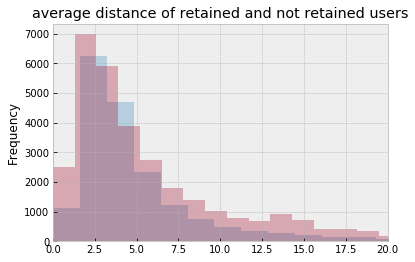

In [196]:
udf2.avg_dist[(udf2.retained==1)].plot.hist(xlim=(0,20), bins=100, alpha=0.3, title='average distance of retained and \
not retained users')
udf2.avg_dist[(udf2.retained==0)].plot.hist(xlim=(0,20), bins=100, alpha=0.3)
plt.show()

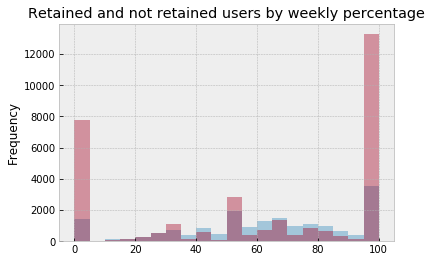

In [197]:
udf2.weekday_pct[(udf2.retained==1)].plot.hist(bins=20, alpha=0.4, title='Retained and not retained users by weekly percentage')
udf2.weekday_pct[(udf2.retained==0)].plot.hist(bins=20, alpha=0.4)
plt.show()

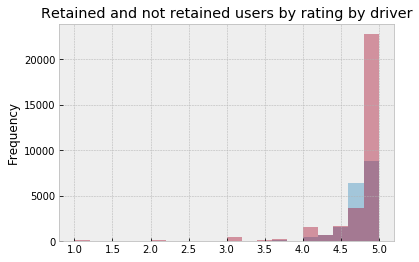

In [198]:
udf2.avg_rating_by_driver[(udf2.retained==1)].plot.hist(bins=20, alpha=0.4, title='Retained and not retained users by rating by driver')
udf2.avg_rating_by_driver[(udf2.retained==0)].plot.hist(bins=20, alpha=0.4)
plt.show()

### 3. How might Ultimate leverage insights.
From the feature importances above, it looks like average distance, weekday percentage, and average rating by driver are the most importaint features for making predictions. Looking closer at histogram plots of retained and not retained overlapped per factor, we can gain more insight. Average distance seem to be lower for a higher retention rate. Ultimate might encourage users to take shorter trips through incentives. Weekly percentage shows a range of about 40-90 percent is good for retention. And, not suprisingly, if a user gets higher ratings, they tend to be retained more.